In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import matplotlib.pyplot as plt


### Load dataset

In [20]:
df = pd.read_csv('song_data.csv')

### Korrelations Analyse

In [21]:
# Drop non-numeric columns
numeric_df = df.drop(['song_name'], axis=1)


# Create new features (polynomial features)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df.drop(['song_popularity'], axis=1))

In [22]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [23]:
# Print the correlation matrix
print(correlation_matrix)

                  song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895 

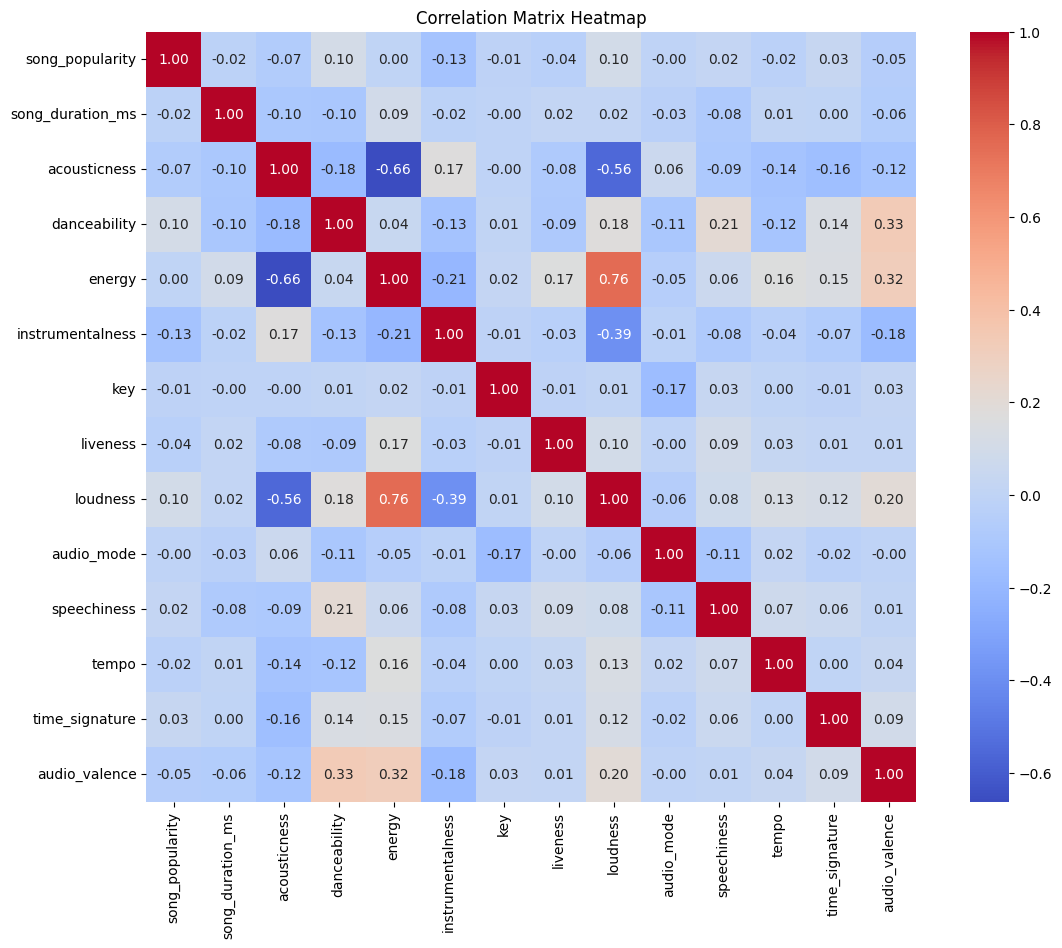

In [24]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
# Extract the correlation of features with the target variable 'song_popularity'
correlation_with_target = correlation_matrix['song_popularity'].sort_values(ascending=False)
print(correlation_with_target)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64


### Define features and target

In [26]:
X = df.drop(['song_name', 'song_popularity'], axis=1)
y = df['song_popularity']

### Split dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standardize features

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initialize Decision Tree Regressor

In [29]:
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)


### Train the model

In [30]:
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

### Make predictions

In [31]:
y_pred_dt = decision_tree.predict(X_test_scaled)

### Evaluate the model

In [32]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R^2 Score: {r2_dt}')

Decision Tree Mean Squared Error: 452.4998950719881
Decision Tree R^2 Score: 0.061352905406561686
